In [1]:
import pandas as pd
import numpy as np

In [2]:
print('\n\nAntes de visualizar os resultados dos testes, vamos rever a questão ou a hipótese\n\
que foram a razão de se proceder os testes.\n\n\n\n\
-------------------------REVISÃO-------------------------')



Antes de visualizar os resultados dos testes, vamos rever a questão ou a hipótese
que foram a razão de se proceder os testes.



-------------------------REVISÃO-------------------------


In [3]:
# Carrega a base de dados contendo os registros de importação de fertilizantes
q=pd.read_csv('~/git/BD/temp/q.csv',parse_dates=True)
q

,kton,VL_FOB,kt_ad_soja,fob_ad_soja,date,CO_MES~1,CO_MES~2,CO_MES~3,CO_MES~4,CO_MES~5,...,CO_MES~8,CO_MES~9,CO_MES~10,CO_MES~11,CO_MES~12,kton_pred_tratamento,kton_pred_testemunha,train_size_anos,erro_tratamento,erro_testemunha
0,8.172410,1701628.0,0.000000,0.0,1170288000000000000,False,True,False,False,False,...,False,False,False,False,False,19,19,10.0,10.827590,10.827590
1,11.271542,1960673.0,0.000000,0.0,1172707200000000000,False,False,True,False,False,...,False,False,False,False,False,20,20,10.0,8.728458,8.728458
2,11.358408,1928094.0,0.000000,0.0,1175385600000000000,False,False,False,True,False,...,False,False,False,False,False,20,20,10.0,8.641592,8.641592
3,70.600910,23259053.0,8.941839,4157300.0,1177977600000000000,False,False,False,False,True,...,False,False,False,False,False,79,77,10.0,8.399090,6.399090
4,75.053655,25360832.0,0.000000,0.0,1180656000000000000,False,False,False,False,False,...,False,False,False,False,False,79,78,10.0,3.946345,2.946345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,110.873480,31033651.0,82.162142,37418971.0,1709251200000000000,False,False,True,False,False,...,False,False,False,False,False,82,111,10.0,28.873480,0.126520
206,216.167227,79712513.0,293.968429,132400815.0,1711929600000000000,False,False,False,True,False,...,False,False,False,False,False,140,152,10.0,76.167227,64.167227
207,257.817278,76304398.0,359.495638,155328264.0,1714521600000000000,False,False,False,False,True,...,False,False,False,False,False,141,156,10.0,116.817278,101.817278
208,196.158814,60445874.0,267.647754,115726493.0,1717200000000000000,False,False,False,False,False,...,False,False,False,False,False,144,169,10.0,52.158814,27.158814


In [4]:
# Determina a diferença entre a média dos erros absolutos das importações em kilo ton/mês, com e sem o uso dos dados sobre chuva como _input_
q['teste_estatístico_kton_mês']=q.erro_testemunha-q.erro_tratamento

In [5]:
alpha=0.05

In [6]:
import matplotlib.pyplot as plt
# Define o estilo dos gráficos
plt.style.use('ggplot')

In [7]:
# Define o título dos gráficos
title='Superioridade do Erro do Testemunha'

In [8]:
print('\
\n\nComo os meses, devido a sazonalidade, são considerados tratamento secundário cruzado ao tratamento principal\n\
estes serão analizados individualmente.\n\n')



Como os meses, devido a sazonalidade, são considerados tratamento secundário cruzado ao tratamento principal
estes serão analizados individualmente.




In [9]:
q.head(1)

,kton,VL_FOB,kt_ad_soja,fob_ad_soja,date,CO_MES~1,CO_MES~2,CO_MES~3,CO_MES~4,CO_MES~5,...,CO_MES~9,CO_MES~10,CO_MES~11,CO_MES~12,kton_pred_tratamento,kton_pred_testemunha,train_size_anos,erro_tratamento,erro_testemunha,teste_estatístico_kton_mês
0,8.17241,1701628.0,0.0,0.0,1170288000000000000,False,True,False,False,False,...,False,False,False,False,19,19,10.0,10.82759,10.82759,0.0


In [10]:
q['Mês']=q.date.astype('datetime64[ns]').dt.month

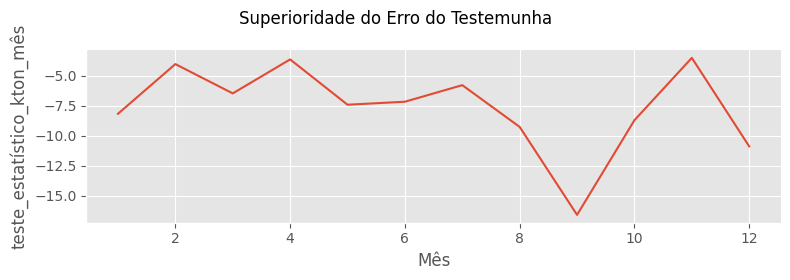

In [11]:
import seaborn as sns
sns.relplot(data=q.groupby('Mês').teste_estatístico_kton_mês.mean().reset_index(),x='Mês',y='teste_estatístico_kton_mês',\
            kind='line',height=2.5,aspect=2*1.6)\
.fig.suptitle(title,y=1.1)
plt.show()

In [12]:
a=

SyntaxError: invalid syntax (62411553.py, line 1)

In [ ]:
print('\
\n\nNo gráfico acima podemos ver a sazonalidade, lembrando uma curva senoide, que se move suavemente\n\
entre a parte alta e baixa do gráfico.\n\n\
Vamos identificar o mês com resultado mais positivo para fazer nele o teste de hipótese proposto.\n\n\
Adicionalmente vamos identificar o mês de resultado mais negativo, para testar também o oposto da hipótese principal,\n\
ou seja, se a inclusão dos dados de chuva nos cálculos pode reduzir a precisão das previsões de importação.')

In [ ]:
mes_pos=q.groupby('Mês').teste_estatístico_kton_mês.mean().reset_index().sort_values('teste_estatístico_kton_mês').Mês.values[-1]
print(f'\n\nO mês de resultado mais positivo foi o mês {mes_pos}.')

In [ ]:
mes_neg=q.groupby('Mês').teste_estatístico_kton_mês.mean().reset_index().sort_values('teste_estatístico_kton_mês').Mês.values[0]
print(f'\n\nO mês de resultado mais negativo foi o mês {mes_neg}.')

In [ ]:
q_pos=q[q.Mês==mes_pos]

In [ ]:
q_neg=q[q.Mês==mes_neg]

In [ ]:
print(f'\n\nResultados dos testes no mês mais positivo, mês {mes_pos}:')

p1=q_pos[['date','kton']].reset_index(drop=True).assign(tipo='Real')

p2=q_pos[['date','kton_pred_tratamento']].reset_index(drop=True).assign(tipo='Previsão_tratamento')\
.rename(columns={'kton_pred_tratamento':'kton'})

p3=q_pos[['date','kton_pred_testemunha']].reset_index(drop=True).assign(tipo='Preisão_testemunha')\
.rename(columns={'kton_pred_testemunha':'kton'})

q_pos_l=pd.concat([p1,p2,p3]).dropna()

g=sns.relplot(data=q_pos_l,x='date',y='kton',hue='tipo', kind='line',height=3,aspect=3*1.6)\
.fig.suptitle(f'Importação de Fertilizantes na Bahia no mês de melhor resultado do tratamento - mês:{mes_pos}')
plt.show()

fig=g.get_figure()
fig.savefig('best.png')


print('\n\nUtilizando a técnica da reamostragem conseguimos visualizar a normalidade da  distribuição dos resultados.')

# Step 3. Repeat steps 1 & 2 many times, appending to a list
so_boot_distn = []
for i in range(5000):
    so_boot_distn.append(q_pos.sample(frac=1, replace=True)['teste_estatístico_kton_mês'].mean())

sns.displot(so_boot_distn,height=2,aspect=2*1.6).fig.suptitle(title,y=1.1)
plt.xlabel('kton/mês')
plt.show()


m=np.mean(so_boot_distn)
s=np.std(so_boot_distn,ddof=1)

z_score=(0-m)/s

from scipy.stats import norm
p=round(norm.cdf(z_score,loc=0,scale=1),3)
print(f"O p_value foi de {p}.")

erro_tratamento_mean=q_pos.erro_tratamento.mean()

erro_testemunha_mean=q_pos.erro_testemunha.mean()

print(f'\n\
No mês {mes_pos}, em média o errou da testemunha ficou {round(m)} kton maior que o tratamento.\n\
Isso corresponde a {round(((erro_testemunha_mean-erro_tratamento_mean)/erro_tratamento_mean)*100)} % a mais de erro.')

if p<=alpha:
    print(f'\n\nPelo método paramétrico, com significância de {alpha}, "reject Ho".')
else:
    print(f'\n\nPelo método paramétrico, com significância de {alpha}, "fail to reject Ho".')

print('\n\n Porém, visualmente se pode notar anormalidades na curva normal criada. Isso ocorre devido a baixo número de amostras originais.')

print(f"\n\nPelo método paramétrico de reamostragem, é exigido que se tenham no mínimo 30 amostras originais para se proceder\n\
o teste de hipótese. Neste nosso caso, o número de amostras esta bem abaixo, com apenas {len(q_pos)} amostras, o que **invalida**\n\
a reijeição feita acima.\
\n\nNessa situação, a alternativa para proceder o teste de hipóteses são os métodos não paramétricos, como o de Wilcoxon:")

import pingouin

p_w=pingouin.wilcoxon(
    x=q_pos.erro_tratamento,
    y=q_pos.erro_testemunha,
    alternative='less'
)

display(p_w[['p-val']])

p=p_w['p-val'].values[0]

if p<=alpha:
    print(f'\n\nPor método não paramétrico, com significância de {alpha}, "reject Ho".')
else:
    print(f'\n\nPor método não paramétrico, com significância de {alpha}, "fail to reject Ho".')
    

print(f'\n\nEnfim, podemos afirmar com significância estatística que levar em conta os dados de chuvas\n\
nas condições aqui determinadas, aumentou a precisão das previsões das importações de fertilizantes.\n\n\
Vamos aproveitar o conjunto de testes realizados para testar uma nova hipótese, inversa da inicial.\n\n\
Ho: No mês de resultado mais negativo, mês {mes_neg}, utilizar os dados de chuva pode reduzir a precisão\n\
da previsão de importação de fertilizantes?')

In [ ]:
print(f'\n\nResultados dos testes no mês mais negativo, mês {mes_neg}:')

p1=q_neg[['date','kton']].reset_index(drop=True).assign(tipo='Real')

p2=q_neg[['date','kton_pred_tratamento']].reset_index(drop=True).assign(tipo='Previsão_tratamento')\
.rename(columns={'kton_pred_tratamento':'kton'})

p3=q_neg[['date','kton_pred_testemunha']].reset_index(drop=True).assign(tipo='Preisão_testemunha')\
.rename(columns={'kton_pred_testemunha':'kton'})

q_neg_l=pd.concat([p1,p2,p3]).dropna()

sns.relplot(data=q_neg_l,x='date',y='kton',hue='tipo', kind='line',height=3,aspect=3*1.6)\
.fig.suptitle(f'Importação de Fertilizantes na Bahia no mês de pior resultado do tratamento - mês:{mes_neg}',y=1.1)
plt.show()

print('\n\nUtilizando a técnica da reamostragem conseguimos visualizar a normalidade da  distribuição dos resultados.')

# Step 3. Repeat steps 1 & 2 many times, appending to a list
so_boot_distn = []
for i in range(5000):
    so_boot_distn.append(q_neg.sample(frac=1, replace=True)['teste_estatístico_kton_mês'].mean())

sns.displot(so_boot_distn,height=2,aspect=2*1.6).fig.suptitle(title,y=1.1)
plt.xlabel('kton/mês')
plt.show()

m=np.mean(so_boot_distn)
s=np.std(so_boot_distn,ddof=1)

z_score=(0-m)/s

from scipy.stats import norm
p=round(1-norm.cdf(z_score,loc=0,scale=1),3)
print(f"O p_value foi de {p}.")

erro_tratamento_mean=q_neg.erro_tratamento.mean()

erro_testemunha_mean=q_neg.erro_testemunha.mean()

print(f'\n\
No mês {mes_neg}, em média o errou da testemunha ficou {-round(m)} kton menor que o tratamento.\n\
Isso corresponde a {round(((erro_tratamento_mean-erro_testemunha_mean)/erro_tratamento_mean)*100)} % a menos de erro.')

if p<=alpha:
    print(f'\n\nPelo método paramétrico, com significância de {alpha}, "reject Ho".')
else:
    print(f'\n\nPelo método paramétrico, com significância de {alpha}, "fail to reject Ho".')

print('\n\nPorém, pela mesma razão do teste anterior, visualmente se pode notar anormalidades na curva normal criada.\n\
Isso ocorre devido a baixo número de amostras originais.')

print(f"\n\nPelo método paramétrico de reamostragem, é exigido que se tenham no mínimo 30 amostras originais para se proceder\n\
o teste de hipótese. Neste nosso caso, o número de amostras esta bem abaixo, com apenas {len(q_neg)} amostras, o que **invalida**\n\
a reijeição feita acima.\
\n\nNessa situação, a alternativa para proceder o teste de hipóteses são os métodos não paramétricos, como o de Wilcoxon:")

import pingouin

p_w=pingouin.wilcoxon(
    y=q_neg.erro_tratamento,
    x=q_neg.erro_testemunha,
    alternative='less'
)

display(p_w[['p-val']])

p=p_w['p-val'].values[0]

if p<=alpha:
    print(f'\n\nPor método não paramétrico, com significância de {alpha}, "reject Ho".')
else:
    print(f'\n\nPor método não paramétrico, com significância de {alpha}, "fail to reject Ho".')
    

print(f'\n\nEnfim, NÃO podemos afirmar com significância estatística que levar em conta os dados de chuvas\n\
nas condições aqui determinadas, reduziu a precisão das previsões das importações de fertilizantes.\n\n')

In [ ]:
print('\
\n\nConclusão Final\n\n\
Concatenando as duas conclusões anteriores, sobre utilizar aicionalmente dados de chuva para previsão de importação de fertilizantes:\n\n\
\t* Se pode afirmar com segurança que, ao menos para alguns meses dos ano, a precisão das previsões é aumentada.\n\n\
\t* Não se pode afirmar com segurança que, ao menos para alguns meses dos ano, a precisão das previsões é reduzida.')